## Restaurant Recommendation System <br>
#### By: Tulika Kotian, Venkata Masthan Sai Nishant Karri, and Sai Charan Amaravathi 

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import json
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer

Importing first dataset - Businesses on Yelp 

In [2]:
business = open('yelp_academic_dataset_business.json')
businesses = pd.DataFrame([json.loads(x) for x in business.readlines()])
business.close()

In [3]:
businesses.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


Importing second dataset - Reviews on Yelp

In [4]:
yelp = pd.read_csv('yelp.csv')

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
reviews = yelp[['review_id', 'user_id', 'business_id', 'text', 'stars', 'date']]

In [7]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
text           0
stars          0
date           0
dtype: int64

In [8]:
reviews.head()

,review_id,user_id,business_id,text,stars,date
0,fWKvX83p0-ka4JS3dc6E5A,rLtl8ZkDX5vH5nAx9C3q5Q,9yKzy9PApeiPPOUJEtnvkg,My wife took me here on my birthday for breakf...,5,2011-01-26
1,IjZ33sJrzXqU-0X6U8NwyA,0a2KyEL0d3Yb1V6aivbIuQ,ZRJwVLyzEJq1VAihDhYiow,I have no idea why some people give bad review...,5,2011-07-27
2,IESLBzqUCLdSzSqm0eCSxQ,0hT2KtfLiobPvh6cDC8JQg,6oRAC4uyJCsJl1X0WZpVSA,love the gyro plate. Rice is so good and I als...,4,2012-06-14
3,G-WvGaISbqqaMHlNnByodA,uZetl9T0NcROGOyFfughhg,_1QQZuf4zZOyFCvXc0o6Vg,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2010-05-27
4,1uJFq2r5QfJG_6ExMRCaGw,vYmM4KTsC8ZfQBg-j5MWkw,6ozycU1RpktNG2-1BroVtw,General Manager Scott Petello is a good egg!!!...,5,2012-01-05


In [9]:
reviews.shape

(10000, 6)

In [11]:
reviews_data = reviews[['business_id', 'user_id', 'stars', 'text']]

Text preprocessing - removing stopwords, and removing punctuations

In [12]:
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

In [13]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    return " ".join([word for word in nopunc.split() if word.lower() not in stop])

In [14]:
reviews_data['text'] = reviews_data['text'].apply(text_process)

C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Training and Testing datasets: 85:15

In [15]:
vld_size=0.15
X_train, X_valid, y_train, y_valid = train_test_split(reviews_data['text'], reviews['business_id'], test_size = vld_size) 

In [16]:
userid = reviews_data[['user_id','text']]
businessid = reviews_data[['business_id', 'text']]

In [17]:
userid.head()

,user_id,text
0,rLtl8ZkDX5vH5nAx9C3q5Q,wife took birthday breakfast excellent weather...
1,0a2KyEL0d3Yb1V6aivbIuQ,idea people give bad reviews place goes show p...
2,0hT2KtfLiobPvh6cDC8JQg,love gyro plate Rice good also dig candy selec...
3,uZetl9T0NcROGOyFfughhg,Rosie Dakota LOVE Chaparral Dog Park convenien...
4,vYmM4KTsC8ZfQBg-j5MWkw,General Manager Scott Petello good egg go deta...


Sample reviews in the userid dataframe

In [18]:
userid[userid['user_id']=='rLtl8ZkDX5vH5nAx9C3q5Q']['text']

0       wife took birthday breakfast excellent weather...
25      place great nice little ole fashion homemade i...
984     went last night wife celebrate 2 year wedding ...
1255    went Saturday night party 4 pretty neat place ...
2425    wanting eat since opened finally got opportuni...
2864    stop numero uno groups light rail bar crawl No...
4649    lunch day bit noon lunch rush crowded could te...
4931    went party 6 Saturday night table ready waitin...
5426    still idea place know dog needed pills treat v...
7688    went party 4 Saturday night surprisingly dead ...
7851    5 stars uniqueness place interesting food flav...
8243    place twice far first time idea expect since n...
8785    went lunch really nothing add reviews pretty m...
9598    Finally teriyaki bowl place right Nothing Samu...
9968    never know expect Every time heard name Duck D...
Name: text, dtype: object

In [19]:
businessid.head()

,business_id,text
0,9yKzy9PApeiPPOUJEtnvkg,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,idea people give bad reviews place goes show p...
2,6oRAC4uyJCsJl1X0WZpVSA,love gyro plate Rice good also dig candy selec...
3,_1QQZuf4zZOyFCvXc0o6Vg,Rosie Dakota LOVE Chaparral Dog Park convenien...
4,6ozycU1RpktNG2-1BroVtw,General Manager Scott Petello good egg go deta...


In [20]:
userid = userid.groupby('user_id').agg({'text': ' '.join})
businessid = businessid.groupby('business_id').agg({'text': ' '.join})

In [21]:
userid.head()

,text
user_id,
--65q1FpAL_UQtVZ2PTGew,Throwing picture Sheriff Arpaio wall aside rea...
--VxRvXk3b8FwsSbC2Zpxw,Good sandwich Better chains beat Jasons deli w...
--rlgfAvvi0BtfRDA1p-VQ,One legit brewpubs around
-2S6keboidRPly-h5lBfkA,Food pretty good biggest issue service made re...
-2XA34d6OGYEUuzqC7yhBg,Fantastic order anything menu pleasantly surpr...


In [22]:
userid.loc['--65q1FpAL_UQtVZ2PTGew']['text']

'Throwing picture Sheriff Arpaio wall aside really enjoy burger reading reviews decided go sweet spicy burger good reviews say burger juicy every topping melted together mouth perfectly fries good fries nothing special sweet potato fritters hand super tasty sound consistency loaded rich flavor like sweet potato fries must try fritters pretty good experience worth checking Arcadia neighborhood review waiting waiting get goes Baiz market reminds Chicago many great Middle Eastern markets back felt spoiled came Phoenix know many think Lee Lee goto spot Asian cooking needs Baiz place go Middle Eastern cooking needs Al Hana check review right inside satiate hunger Baiz numero uno book place fantastic food fantastic prices fantastic able grab ingredients need make homemade baba ganoush snacking amazing kufta sandwich pretty okay knew heading Papago Brewing going get good beer expect pretty decent barstyle thin crust pizza well table ordered TRex basically loaded every pizza topping made pig f

Applying feature extraction on the reviews

In [23]:
userid_vec = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
userid_vector = userid_vec.fit_transform(userid['text'])
userid_vector.shape

(6403, 5000)

In [24]:
userid_vector

<6403x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 457919 stored elements in Compressed Sparse Row format>

In [25]:
#Business id vectorizer
businessid_vec = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
businessid_vector = businessid_vec.fit_transform(businessid['text'])
businessid_vector.shape

(4174, 5000)

In [26]:
userid_rating_matrix = pd.pivot_table(reviews_data, values='stars', index=['user_id'], columns=['business_id'])
userid_rating_matrix.shape

(6403, 4174)

In [27]:
userid_rating_matrix.head()

business_id,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-1N0Z3uM8xbxKS8XiAnaog,-34jE_5dujSWMIOBudQsiQ,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,-4A5xmN21zi_TXnUESauUQ,-5EWgRkudDlcCbQSIL_twA,-5rFC4EVrT-v8g1PSEf6Xg,-6O53B-ksqSKzWM6Y9moEQ,...,zrO-RPR3fSdA7sI-IRGWIQ,zruUQvFySeXyEd7_rQixBg,zsApK-QhjBm2mTqq4VWYPQ,zsWJEyP8YyJkux0muGtiVw,zw2iJahOnSxlzmRlF4al6g,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyYRWnimLbQt9aCCI_2MZw
user_id,,,,,,,,,,,,,,,,,,,,,
--65q1FpAL_UQtVZ2PTGew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--VxRvXk3b8FwsSbC2Zpxw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--rlgfAvvi0BtfRDA1p-VQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2S6keboidRPly-h5lBfkA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2XA34d6OGYEUuzqC7yhBg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
P = pd.DataFrame(userid_vector.toarray(), index=userid.index, columns=userid_vec.get_feature_names())
Q = pd.DataFrame(businessid_vector.toarray(), index=businessid.index, columns=businessid_vec.get_feature_names())

Matrix Vectorization Algorithm

In [29]:
def matrix_factorization(R, P, Q, steps=3, gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        
    return P,Q

In [30]:
%%time
P, Q = matrix_factorization(userid_rating_matrix, P, Q, steps=3, gamma=0.001,lamda=0.02)

Wall time: 58min 58s


In [31]:
Q.head()

,0,1,10,100,1000,101,1015,1030,10pm,11,...,yup,z,zero,zin,zinburger,zinc,zipps,zone,zoo,zucchini
business_id,,,,,,,,,,,,,,,,,,,,,
-0QBrNvhrPQCaeo7mTo0zQ,0.000000e+00,2.447822e-10,1.047328e-01,0.000000e+00,2.059887e-14,0.000000e+00,1.327510e-14,4.586804e-15,0.000000e+00,1.122790e-11,...,0.000000e+00,0.000000e+00,1.186902e-12,5.781464e-12,0.000000e+00,0.000000e+00,0.000000e+00,1.086946e-14,5.102047e-12,0.000000e+00
-0bUDim5OGuv8R0Qqq6J4A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-1N0Z3uM8xbxKS8XiAnaog,0.000000e+00,1.353153e-09,9.132449e-02,5.649218e-08,3.229957e-15,9.819810e-18,2.039135e-17,5.691524e-18,1.369652e-14,3.919526e-12,...,6.857818e-20,2.441214e-17,2.209208e-14,6.926870e-18,2.839085e-20,2.043450e-15,3.644277e-22,2.712995e-17,2.907730e-14,8.939666e-15
-34jE_5dujSWMIOBudQsiQ,0.000000e+00,5.519328e-07,5.283960e-07,1.306320e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.472160e-10
-3WVw1TNQbPBzaKCaQQ1AQ,3.966991e-12,3.074797e-02,2.889151e-02,1.923267e-06,1.368094e-13,1.373778e-08,6.449392e-12,1.696776e-04,7.914666e-12,1.345836e-04,...,1.738482e-14,1.881521e-08,6.634137e-09,8.646435e-15,1.555378e-03,7.527207e-20,2.207536e-14,1.569049e-13,1.429173e-08,1.194391e-11


In [32]:
Q.iloc[0].sort_values(ascending=False).head(10)

mexican      0.248332
shrimp       0.245999
videos       0.216437
van          0.206047
decently     0.204342
burro        0.199627
hood         0.198246
necessary    0.195573
foot         0.174075
rush         0.160467
Name: -0QBrNvhrPQCaeo7mTo0zQ, dtype: float64

Test Input to get top restaurant recommendations - we are giving the following input to the system : I want to have eggs for breakfast

In [37]:
test_input = "i want to have eggs for breakfast"
test_df= pd.DataFrame([test_input], columns=['text'])
test_df['text'] = test_df['text'].apply(text_process)
test_vectors = userid_vec.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index, columns=userid_vec.get_feature_names())

predictItemRating=pd.DataFrame(np.dot(test_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Rating'],ascending=[0])[:7]

for i in topRecommendations.index:
    print(businesses[businesses['business_id']==i]['name'].iloc[0])
    print(businesses[businesses['business_id']==i]['categories'].iloc[0])
    print('Star rating: ' + str(businesses[businesses['business_id']==i]['stars'].iloc[0])+ '; Number of reviews: '+str(businesses[businesses['business_id']==i]['review_count'].iloc[0]))
    print('')

The Good Egg
['Breakfast & Brunch', 'Restaurants']
Star rating: 4.0; Number of reviews: 45

Breakfast Club
['Breakfast & Brunch', 'American (Traditional)', 'Restaurants']
Star rating: 3.5; Number of reviews: 382

Crackers & Co Cafe
['Breakfast & Brunch', 'American (Traditional)', 'Restaurants']
Star rating: 4.0; Number of reviews: 155

Butterfield's Pancake House
['Breakfast & Brunch', 'Restaurants']
Star rating: 4.0; Number of reviews: 236

Butters Pancakes & Café
['Breakfast & Brunch', 'Cafes', 'Restaurants']
Star rating: 4.0; Number of reviews: 179

Verde
['Mexican', 'Restaurants']
Star rating: 4.0; Number of reviews: 59

The Good Egg
['Breakfast & Brunch', 'Restaurants']
Star rating: 3.5; Number of reviews: 26



Visualizations on the datasets

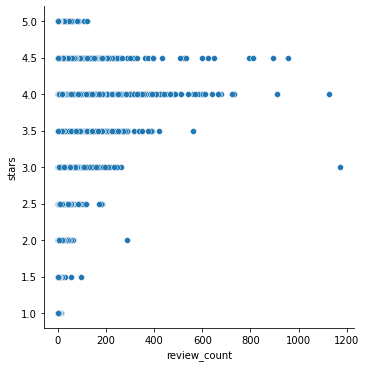

In [38]:
sns.relplot(x="review_count", y="stars", data=businesses)

C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


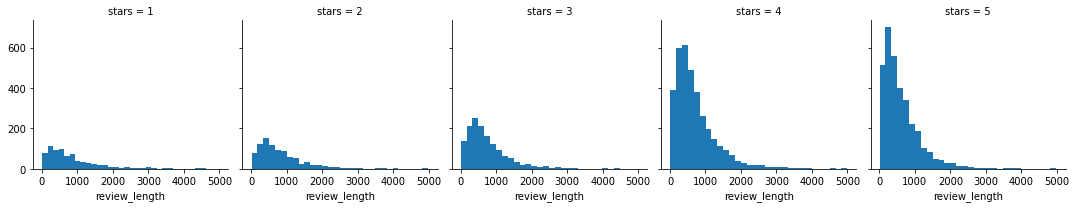

In [39]:
reviews['review_length'] = reviews['text'].apply(len)
g= sns.FacetGrid(reviews,col ='stars')
g.map(plt.hist,'review_length',bins = 30)

<AxesSubplot:xlabel='stars', ylabel='count'>

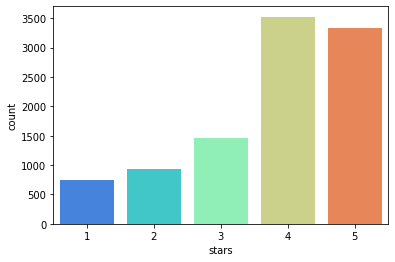

In [40]:
sns.countplot(x='stars',data= reviews, palette='rainbow')

Text(0.5, 1.0, 'Wordcloud for 1 star ratings')

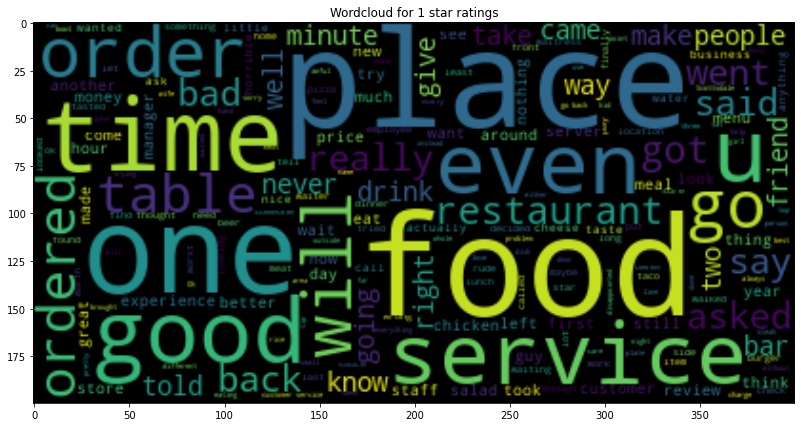

In [42]:
import wordcloud
from wordcloud import WordCloud
num_stars =  1
this_star_text = ''
for t in reviews[reviews['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for 1 star ratings')

Text(0.5, 1.0, 'Wordcloud for 5 star ratings')

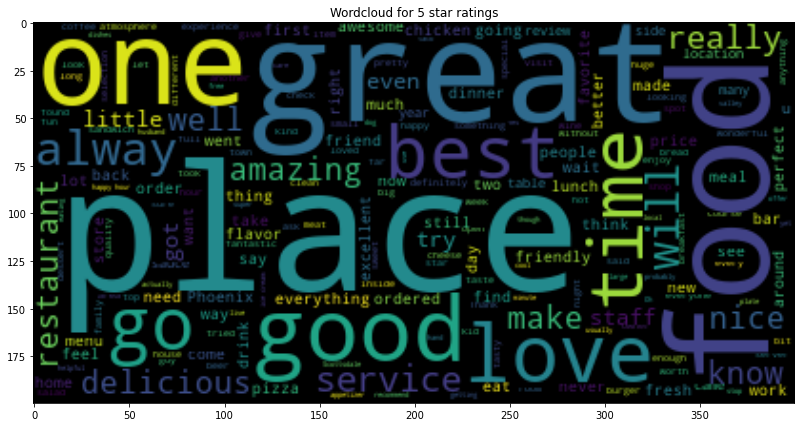

In [43]:
import wordcloud
from wordcloud import WordCloud
num_stars =  5
this_star_text = ''
for t in reviews[reviews['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for 5 star ratings')